In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [105]:
df = pd.read_excel("Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [107]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [108]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [109]:
df.duplicated().sum()

5268

In [110]:
df['Year']=(df['InvoiceDate']).dt.year
df["Month"] = (df["InvoiceDate"]).dt.month
df["Day"] = (df["InvoiceDate"]).dt.day
df["Hour"] = (df["InvoiceDate"]).dt.hour
df["DayName"] = (df["InvoiceDate"]).dt.day_name()

In [111]:
df.drop_duplicates(inplace=True)

In [112]:
df.dropna(inplace=True)

In [113]:
df["CustomerID"] = df["CustomerID"].astype(np.int64)

In [114]:
df.drop(df[df["UnitPrice"]<=0].index,inplace=True)

In [115]:
len(df[df["Quantity"]<=0])

8872

In [116]:
print("Percentage of cancelled transactions:" , round(len(df[df["Quantity"]<=0])/len(df)*100, 2),"%")


Percentage of cancelled transactions: 2.21 %


In [117]:
df.drop(df[df["Quantity"]<=0].index,inplace=True)

In [119]:
df["InvoiceDate"] = (df["InvoiceDate"]).dt.date

In [120]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,DayName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010,12,1,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010,12,1,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1,8,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,2011,12,9,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,2011,12,9,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,2011,12,9,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,2011,12,9,12,Friday


In [121]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [157]:
plot = pd.DataFrame(df.groupby(['InvoiceDate'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df.groupby(['DayName'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df.groupby(['Hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(df.groupby(['InvoiceDate'])['Revenue'].mean()).reset_index()
plot5 = pd.DataFrame(df.groupby(['InvoiceDate'])['Revenue'].sum()).reset_index()

In [158]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']).reset_index()
plot2

,DayName,InvoiceNo
0,Monday,64231.0
1,Tuesday,65744.0
2,Wednesday,68040.0
3,Thursday,79243.0
4,Friday,54222.0
5,Sunday,61212.0
6,Saturday,NaN


Text(0.5, 1.0, 'Transactions per day of the week')

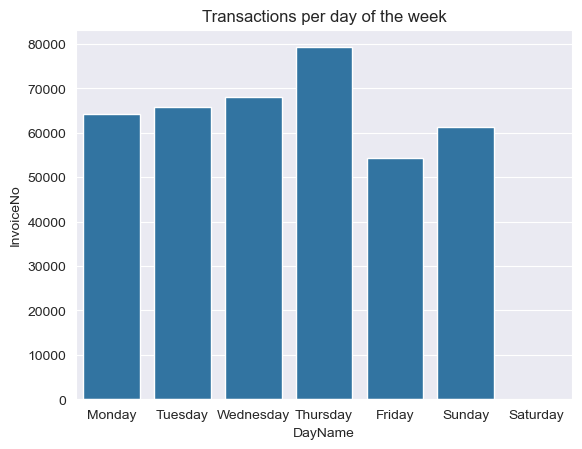

In [167]:
#How many transactions were made in each day of the week?
sns.barplot(x="DayName", y="InvoiceNo", data=plot2).set_title("Transactions per day of the week")

Text(0.5, 1.0, 'Transactions per hour of the day')

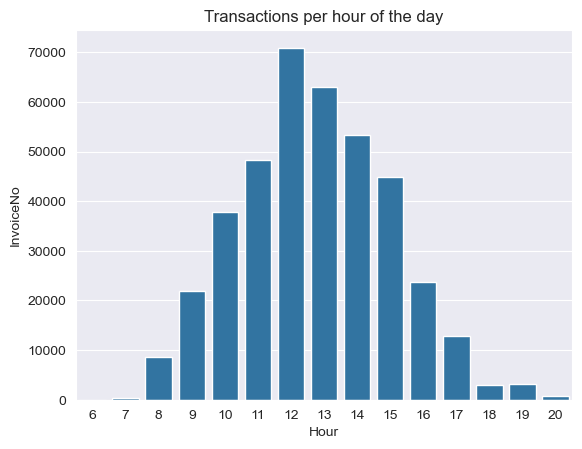

In [168]:
#How many transactions were made in each hour of the day?s
sns.barplot(x="Hour", y="InvoiceNo", data=plot3).set_title("Transactions per hour of the day")

Text(0.5, 1.0, 'Revenue per month')

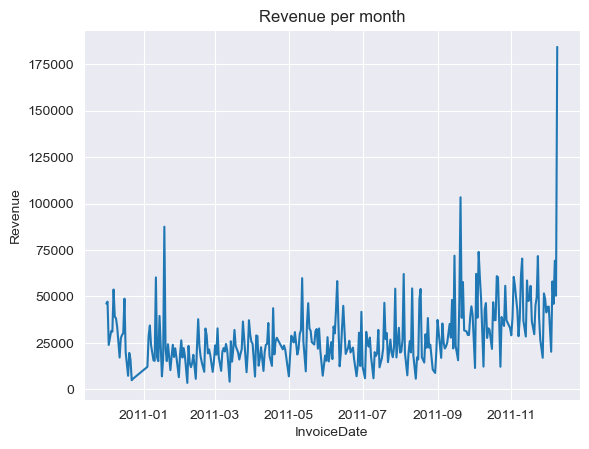

In [172]:
# Which month brings the highest revenue?
sns.lineplot(x="InvoiceDate", y="Revenue", data=plot5).set_title("Revenue per month")

In [176]:
unique_customer=df[['Country','CustomerID']].drop_duplicates()

In [177]:
unique_customer.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3920
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


In [178]:
plot6 = pd.DataFrame(df.groupby(['Country'])['Revenue'].sum()).reset_index()
plot6 = plot6.sort_values(['Revenue']).reset_index(drop=True)
plot7 = pd.DataFrame(df.groupby(['Country'])['Revenue'].count()).reset_index()
plot7 = plot7.sort_values(['Revenue']).reset_index(drop=True)

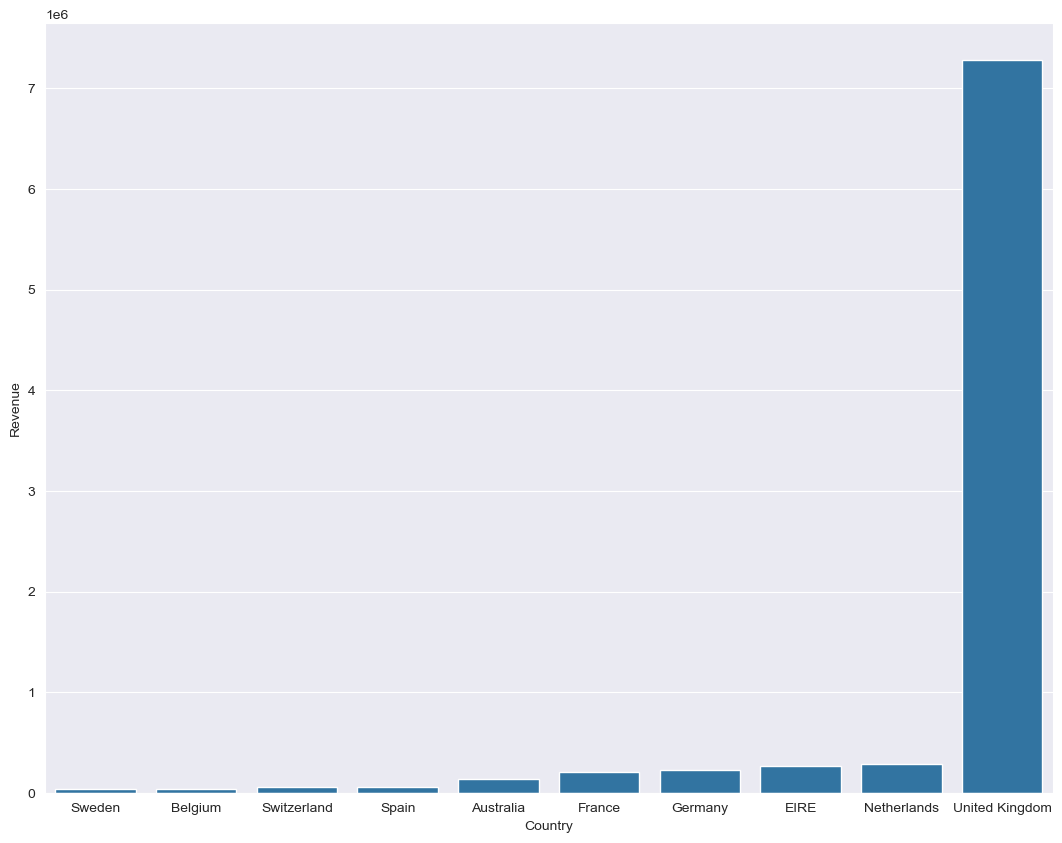

In [212]:
# The most sales makes in which country?
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax=sns.barplot(x='Country', y='Revenue',data=plot6.tail(10))
plt.show()

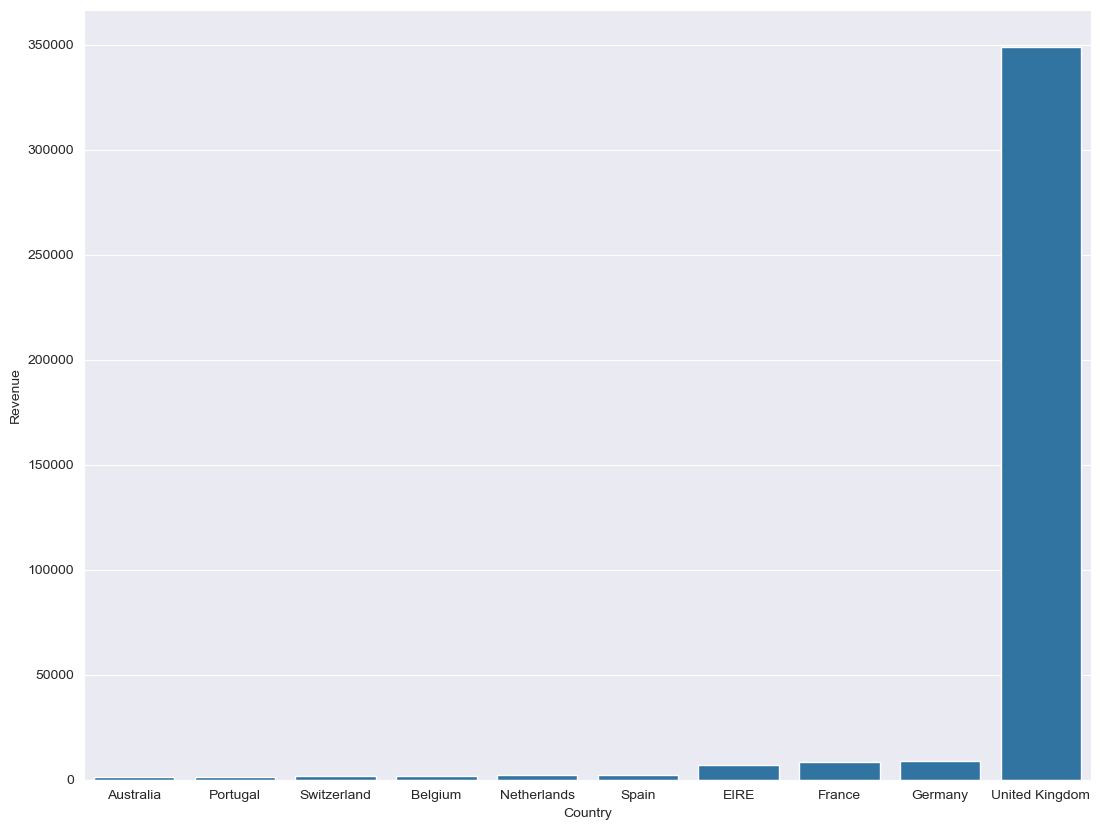

In [215]:
# The most Order makes in which country?
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax=sns.barplot(x='Country', y='Revenue',data=plot7.tail(10))
plt.show()

In [219]:
#Top Customers
df['freq'] = df.groupby('CustomerID')['CustomerID'].transform('count')

In [226]:
customer  = pd.DataFrame(df.groupby(['CustomerID'])['Revenue'].sum().sort_values(ascending=False)).reset_index().head(10)
customer["CustomerID"].to_list()

[14646, 18102, 17450, 16446, 14911, 12415, 14156, 17511, 16029, 12346]

In [227]:
top_customer = df[df['CustomerID'].isin(customer['CustomerID'].tolist())][['CustomerID', 'Country', 'Revenue', 'Quantity', 'freq']]
top_customer['Country'].unique().tolist()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

In [228]:
df_germany = df[df['Country'] == "Germany"]
df_germany

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,DayName,Revenue,freq
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01,2.95,12662,Germany,2010,12,1,13,Wednesday,17.70,230
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01,2.55,12662,Germany,2010,12,1,13,Wednesday,15.30,230
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01,0.85,12662,Germany,2010,12,1,13,Wednesday,10.20,230
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01,1.65,12662,Germany,2010,12,1,13,Wednesday,19.80,230
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01,1.95,12662,Germany,2010,12,1,13,Wednesday,23.40,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09,1.25,12713,Germany,2011,12,9,12,Friday,15.00,38
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09,0.85,12713,Germany,2011,12,9,12,Friday,10.20,38
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09,0.85,12713,Germany,2011,12,9,12,Friday,10.20,38
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09,2.08,12713,Germany,2011,12,9,12,Friday,24.96,38


In [230]:
print(df_germany['InvoiceDate'].min())
print(df_germany['InvoiceDate'].max())

2010-12-01
2011-12-09


In [236]:
dt.datetime(2011,12,10)
df_germany['InvoiceDate'] = pd.to_datetime(df_germany['InvoiceDate'])

C:\Users\Aiman Osama\AppData\Local\Temp\ipykernel_19544\523189128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany['InvoiceDate'] = pd.to_datetime(df_germany['InvoiceDate'])


In [237]:
rfm = df_germany.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency',
                         'InvoiceNo': 'frequency',
                         'Revenue': 'monetary_value'}, inplace=True)

In [240]:
rfm

,recency,frequency,monetary_value
CustomerID,,,
12426,194,30,582.73
12427,21,31,825.80
12468,187,38,729.54
12471,2,459,19788.65
12472,32,339,6572.11
...,...,...,...
13814,92,57,1579.12
13815,22,176,4027.36
13816,23,28,571.67


In [242]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
rfm_segments= rfm

In [243]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [244]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [245]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

In [246]:
rfm_segments

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12426,194,30,582.73,4,3,3,433
12427,21,31,825.80,2,3,3,233
12468,187,38,729.54,4,3,3,433
12471,2,459,19788.65,1,1,1,111
12472,32,339,6572.11,3,1,1,311
...,...,...,...,...,...,...,...
13814,92,57,1579.12,3,2,2,322
13815,22,176,4027.36,2,1,1,211
13816,23,28,571.67,2,3,3,233


In [247]:
rfm_segments['RFMClass'].unique()

array(['433', '233', '111', '311', '211', '333', '134', '212', '344',
       '343', '244', '221', '412', '332', '122', '312', '322', '144',
       '422', '443', '444', '123', '434', '421', '222', '243', '121',
       '133', '232', '234', '124'], dtype=object)

In [248]:
print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)")
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

Champions:  11 ( 11.7 %)
Loyal Customers:  24 ( 25.53 %)
Big Spenders:  24 ( 25.53 %)
About to Sleep:  7 ( 7.45 %)
Lost Customers:  7 ( 7.45 %)
